In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [4]:
data=pd.read_csv('C:\\Users\\Admin\\Desktop\\Skill Circle\\dataset\\xclara.csv') 
print("Input dataa and shape")
print(data.shape)
data.head()

Input dataa and shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


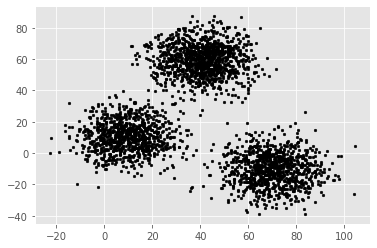

In [6]:
f1=data['V1'].values
f2=data['V2'].values
x=np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,c='black',s=7)

In [7]:
#eucledean diatant caalculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [9]:
k=3
#X corordinate
C_x=np.random.randint(0,np.max(x)-20,size=k)
#Y cordinate
C_y=np.random.randint(0,np.max(x)-20,size=k)
C=np.array(list(zip(C_x,C_y)),dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[ 2. 16.]
 [25. 82.]
 [40. 39.]]


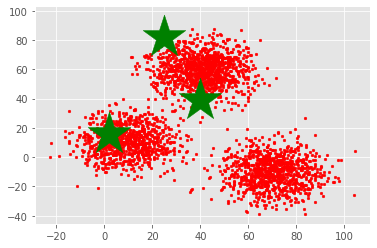

In [10]:
#Plottting
plt.scatter(f1,f2,c='r',s=7)
plt.scatter(C_x,C_y,marker='*',s=2000,c='g')


In [11]:
#to store the valur of centroida when it updates
C_old=np.zeros(C.shape)
#Clusters labels (0,1,2)
clusters=np.zeros(len(x))

In [12]:
#Error function
error=dist(C,C_old,None)

TypeError: list indices must be integers or slices, not tuple

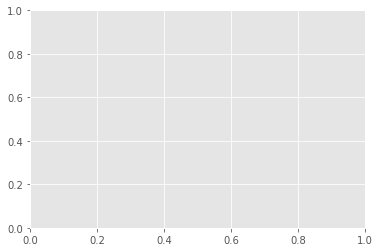

In [34]:
#Loop will run till the errror become zeros
while error !=0:
    # Assingn eACH VALUE to its closest clustre
    for i in range(len(x)):
        distances=dist(x[i],C)
        cluster=np.argmin(distances)
        clusters[i]=cluster
        
        ##storing the old center values
        C_old=deepcopy(C)
        # Finding the new centroids
        for i in range(k):
            points =[x[j] for j in range(len(x)) if clusters[j]==i]
            C[i]=np.mean(points, axis=0)
        error=dist(C,C_old,None)
                           
color=['r','g','b','y','c','m']
fig , ax=plt.subplots()
for i in range(k):
        points =[x[j] for j in range(len(x)) if clusters[j]==i]
        ax.scatter(points[:,0],points[:,1], s=7, c=colors[i])
ax.scatter(C[:,0],C[:,1],marker='*',s=200,c=colors[i])

In [35]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print("Centroid values")
print("Scratch")
print(C) # From Scratch
print("sklearn")
print(centroids) # From sci-kit learn

NameError: name 'X' is not defined